In [1]:
from wand.image import Image
from PIL import Image as pil
import numpy as np
import pandas as pd
import io
import matplotlib.pyplot as plt

In [2]:
#解答用紙を画素ベクトルに変換する関数
def convert_to_array(filename, pix):

    with Image(filename=filename) as f:
        with Image(image=f.sequence[0]) as page1:
            page1 = page1.convert("jpeg")
            page1.save(filename=r"C:\Users\Aki\Documents\saiten\928\test.jpg")
            img = page1.make_blob("jpeg")
            img_array = np.array(pil.open(io.BytesIO(img)))
            img_array = np.sum(img_array, axis=2) / 765
            
            #図への描画
            indexes = np.where(img_array<0.5)
            plt.scatter(indexes[0], indexes[1], s=1)
            plt.title(filename)
            plt.show()
            
            #0のサンプルが多すぎるので削減
            img_array = img_array[:pix]
            
    return img_array

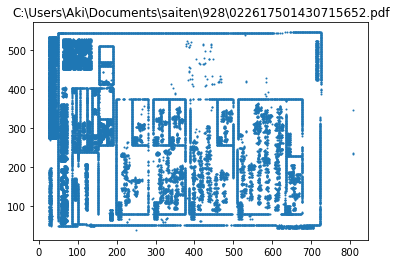

In [3]:
#学習させる答案用紙の指定
train_file = convert_to_array(r"C:\Users\Aki\Documents\saiten\928\022617501430715652.pdf", 400)
y1 = np.zeros(train_file.shape[0], dtype=np.int8)

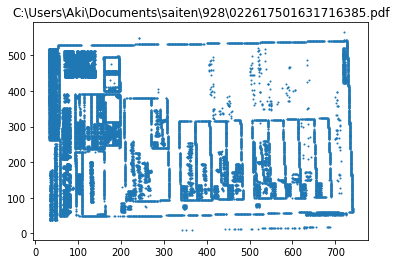

In [4]:
train_file1 = convert_to_array(r"C:\Users\Aki\Documents\saiten\928\022617501631716385.pdf", 400)
y2 = np.zeros(train_file1.shape[0], dtype=np.int8)

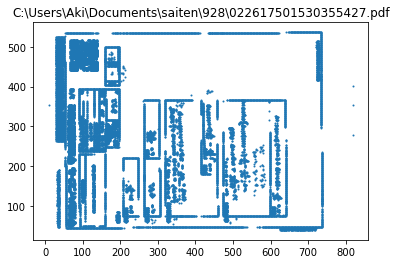

In [5]:
train_file2 = convert_to_array(r"C:\Users\Aki\Documents\saiten\928\022617501530355427.pdf", 400)
y3 = np.zeros(train_file2.shape[0], dtype=np.int8)

In [6]:
#クラスラベルの作成
for i in range(101, 152):
    y1[i] = 1

for i in range(110, 163):
    y2[i] = 1
    
for i in range(108, 160):
    y3[i] = 1
    
#データの連結
X = np.vstack((train_file, train_file1, train_file2))
y = np.hstack((y1, y2, y3))

print(X.shape, y.shape)
print(y1)

(1200, 595) (1200,)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [8]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=10)
model.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [9]:
#trainデータのscore
print(model.score(X, y))

0.999166666667


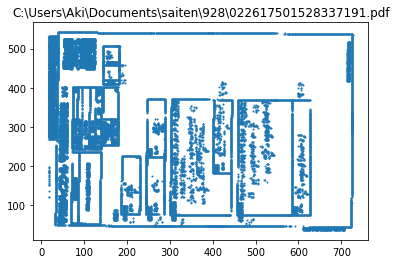

In [10]:
#testデータのscore
X_test = convert_to_array(r"C:\Users\Aki\Documents\saiten\928\022617501528337191.pdf",845)
y_test = np.zeros(X_test.shape[0])

In [11]:
for i in range(86, 139):
    y_test[i] = 1

In [12]:
test_score = model.score(X_test, y_test)

In [13]:
print(test_score)

0.945562130178


In [15]:
y_predicted = model.predict(X_test)
indexes = np.where(y_predicted==1)
print(indexes)

(array([ 90,  91,  96,  98,  99, 100, 101, 105, 426], dtype=int32),)
